# <font color=red>밑바닥부터 시작하는 딥러닝 1 - 한빛미디어, 사이토 고키</font>

### Contents (Chapter)

1. 헬로 파이썬 - 파이썬 기초 문법 소개, numpy, matplotlib
2. 퍼셉트론 - AND, NAND, OR 게이트
3. 신경망 - 활성화 함수, 다차원 배열 계산, 출력층 설계, MNIST
4. **`신경망 학습 - 손실 함수, 경사 하강법`**
5. 오차역전파법 - 역전파, 활성화 함수 구현
6. 학습 관련 기술들 - 매개변수 갱신, 배치 정규화, 하이퍼파라미터 값 찾기
7. 합성곱 신경망 (CNN) - 합성곱 계층, 풀링 계층, CNN 구현
8. 딥러닝 - 초기 역사, 딥러닝 활용
9. Appendix - Softmax with loss 계층의 계산 그래프

### 참고 자료

- [책 소개 링크](http://www.yes24.com/Product/Goods/34970929)
- [책 깃헙 링크](https://github.com/WegraLee/deep-learning-from-scratch)

---

## <font color=orange>Chapter 4. 신경망학습</font>

### 4.1 데이터에서 학습한다!

- 신경망의 특징은 데이터를 보고, 학습 할 수 있다는 점
- **학습**이란, 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 학습의 목표는 **손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것**

#### 4.1.1 데이터 주도 학습

- **기계학습**은 데이터에서 답을 찾고, 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것
- 따라서 기계학습의 중심에는 **데이터**가 존재한다고 할 수 있음
- 기계학습에서는 `사람의 개입을 최소화`하면서 수집한 데이터로 패턴을 찾으려 시도
- MNIST 모델에서 숫자를 인식하는 알고리즘이 동작하기 위해서,
    - 이미지에서 특징 (Feature)을 추출하여 그 특징의 패턴을 기계학습 기술로 학습
    - **특징**은 입력 데이터에서 본질적인 데이터를 정확히 추출할 수 있도록 설계된 변환기
    - 이미지의 특징은 일반적으로 '벡터'로 변환하여 학습
- 기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을 **기계**가 한다고 할 수 있음
- 사람이 직접 설계하는 것에 비해서 부담은 적지만, 이미지를 벡터로 변환하는 등의 과정은 사람이 해야 함
- 문제에 적합한 특징을 설계하지 (전처리) 못한다면, 좋은 결과를 획득하기도 어렵다고 할 수 있음
- 딥러닝을 입력부터 출력까지 사람의 개입 없이 동작하여 **종단간 기계학습 (end-to-end machine learning)**이라고도 함

#### 4.1.2 훈련 데이터와 시험 데이터

- 기계학습 문제는 **훈련 데이터 (Training data)와 시험 데이터 (Test data)**로 나눠 학습과 실험을 수행
- 훈련 데이터를 통해서 학습하면서 최적의 매개변수를 찾음
- 그 후에 시험 데이터를 사용하여 앞서 훈련한 모델의 성과를 평가
- 결국 모델링의 궁극적인 목적은 범용적으로 사용할 수 있는 **일반화된 모델**이므로, 훈련 데이터와 시험 데이터로 구분
- 이를 위해서 한번도 보지 못했던 훈련에 포함되지 않은 데이터로 성능을 측정
- 한 데이터셋에만 지나치게 최적화 된 상태를 **오버피팅 (Overfitting)**이라고 함

### 4.2 손실 함수

- 신경망 학습에서는 현재의 상태를 `하나의 지표`로 표현
- 그 지표를 가장 좋게 만들어주는 가중치 매개변수 값을 찾는 것이 목적
- 신경망 학습에서 사용하는 지표는 **손실 함수 (Loss function)**이라고 하는데, 일반적으로 `오차제곱합과 교차 엔트로피 오차`를 사용
    - 손실 함수는 신경망의 성능의 나쁨을 나타내는 지표
    - 즉, 현재 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하는지의 성능을 담고 있음
    - 따라서 손실 함수의 값이 클수록 좋지 않는 성능을 갖고 있다고 할 수 있음
    
#### 4.2.1 오차제곱합 (Sum of Square for Error, SSE)

<br/>

$$
E = \frac{1}{2}{\sum_{k} (y_k - t_k)^2}
$$

<br/>

- 가장 많이 쓰이는 손실 함수는 **오차제곱합**이고, 수식은 위와 같음
- $y_k$는 신경망의 출력 (신경망이 출력한 값), $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타냄
- 즉, 오차제곱합은 각 원소의 출력과 정답 레이블의 차를 제곱한 후에 그 총합을 구하는 것
- 파이썬 코드로 오차제곱합을 구현하면, 아래와 같음을 알 수 있음
    - MNIST에서 정답이 '2'라고 했을 때, 모델의 출력 결과가 맞았을 때와 틀렸을 때의 손실함수 값 확인
    - 출력 결과가 맞을 때, 손실 함수 값이 0.0975로 작게 나오는 것을 확인할 수 있음
    - 반면, 출력 결과가 틀렸을 때, 손실 함수 값이 0.5975로 크게 나오는 것을 확인할 수 있음
    - 즉, `손실 함수의 값이 작을수록 정답에 수렴한다`고 할 수 있음

In [1]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t)**2)

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높을 때
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t)) # 0.09750000000000003

# 예2: '7'일 확률이 가장 높을 때
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t)) # 0.5975

0.5975

#### 4.2.2 교차 엔트로피 오차 (Cross Entropy Error, CEE)

<br/>

$$
E = -{\sum_{k} t_klog_ey_k}
$$

<br/>

- 위 수식은 교차 엔트로피 오차의 수식
- log는 밑이 e인 자연로그, $y_k$는 신경망의 출력, $t_k$는 정답 레이블이면서 정답 인덱스만 1 (원-핫 인코딩)
- 따라서 실질적으로 정답일 때 추정의 자연로그를 계산하는 식 (다른 경우에는 모두 0이기 때문)
- 즉, `교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 결정`
- 파이썬 코드로 교차 엔트로피 오차를 구현하면, 아래와 같음을 알 수 있음
    - MNIST에서 정답이 '2'라고 했을 때, 모델의 출력 결과가 맞았을 때와 틀렸을 때의 손실함수 값 확인
    - 출력 결과가 맞을 때, 손실 함수 값이 0.5108로 작게 나오는 것을 확인할 수 있음
    - 반면, 출력 결과가 틀렸을 때, 손실 함수 값이 2.3025로 크게 나오는 것을 확인할 수 있음
    - 즉, 위의 오차제곱합과 동일하게 `손실 함수의 값이 작을수록 정답에 수렴한다`고 할 수 있음

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높을 때
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t)) # 0.510825457099338

# # 예2: '7'일 확률이 가장 높을 때
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t)) # 2.3025840929945454

2.3025840929945454

#### 4.2.3 미니배치 학습

<br/>

$$
E = -\frac{1}{N}{\sum_{n}}{\sum_{k} t_klog_ey_k}
$$

<br/>

- 위 수식은 **훈련 데이터 모두**에 대한 손실 함수 값을 구하는 수식
- 앞선 수식과 비슷하고, 데이터 하나에 대한 손실 함수를 단순히 N개의 데이터로 확장한 것
- 마지막에는 N으로 나눠서 정규화 (평균 손실 함수의 역할)
- 하지만 현실적으로 **빅데이터 안에서 이 모든 데이터를 대상으로 값을 계산하는 것은 비효율적**
- 따라서 데이터 일부를 추려 전체의 근사치로 이용하는 **미니배치 (Mini-batch)** 방법을 사용 (일부만 골라 학습)
- 아래 코드는 MNIST 데이터셋에서 np.random.choice 함수를 통해 미니배치로 계산하는 과정을 소개

In [3]:
import sys, os, pickle
github_url = '/Users/paul/Desktop/github/deep-learning-from-scratch-master/'
sys.path.append(github_url)
import numpy as np
from dataset.mnist import load_mnist

### MNIST 데이터셋 불러오기
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

x_train.shape # (60000, 784)
t_train.shape # (60000, 10)

### 훈련 데이터에서 무작위로 10장만 추출하기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [4]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
#     return -np.sum(t * np.log(y + 1e-7)) / batch_size # 원-핫 인코딩이 되어 있는 경우
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size # 원-핫 인코딩이 되어 있지 않은 경우

- 배치 데이터를 지원하는 교차 엔트로피 오차 구현
- y는 신경망의 출력, t는 정답 레이블
- 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있음

#### 4.2.5 왜 손실 함수를 설정하는가?

- 모델의 궁극적인 목적은 높은 정확도를 끌어내는 매개변수 값을 찾아내는 것
- 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾음
- 이때 매개변수의 미분 (기울기)을 계산하여, 그 값을 단서로 값을 서서히 갱신하는 과정을 반복
- 가중치 매개변수의 손실 함수 미분이라는 것은 **가중치 매개변수 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하는지**에 대한 것
    - 미분 값이 음수면, 그 가중치 매개변수를 양의 방향으로 변화시켜서 손실 함수의 값을 줄일 수 있음
    - 반대로 미분 값이 양수면, 가중치 매개변수를 음의 방향으로 변화시켜서 손실 함수 값을 줄일 수 있음
    - 하지만 미분 값이 0이면, 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수 값은 변화하지 않으므로, 매개변수 갱신은 중단
- 정확도를 지표로 삼게 되면, 결과값이 연속적으로 변화하지 못하고, 불연속적으로 띄엄띄엄한 값으로 변화
- 한편, 손실 함수를 지표로 삼으면, 매개변수 값이 변할 때마다 그에 반응하여 손실 함수도 연속적으로 값이 변화
- 따라서 활성화 함수로 계단 함수를 사용하지 않는 이유 역시, 미분값이 불연속적으로 계산되기 때문임
- 시그모이드 함수 같은 경우에는, 출력이 연속적으로 변하면서 곡선의 기울기 역시 연속적으로 변화함

### 4.3 수치 미분

- 경사법에서는 기울기 (경사) 값을 기준으로 나아갈 방향을 정함

#### 4.3.1 미분

- **미분**은 한순간의 변화량을 표시한 것, **수치 미분**은 아주 작은 차분으로 미분하는 것
- 미분을 수식으로 표현하면 아래와 같은데, 이 뜻은 x의 작은 변화가 함수 $f(x)$를 얼마나 변화시키느냐에 대한 것

<br/>

$$
\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

<br/>

In [5]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

#### 4.3.2 수치 미분의 예

- $y = 0.01x^2 + 0.1x$를 그래프로 표현하면 아래와 같음
- 해당 식에서 x가 5일 때와 10일 때의 미분 결과는 각각 0.2, 0.3 정도 

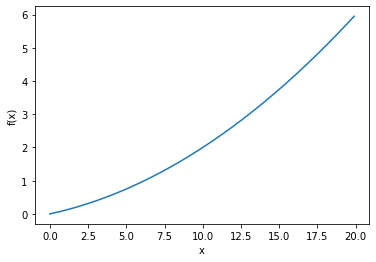

0.2999999999986347

In [6]:
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만듦
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

numerical_diff(function_1, 5)  # 0.1999999999990898
numerical_diff(function_1, 10) # 0.2999999999986347

#### 4.3.3 편미분

- $f(x_0, x_1) = x_0^2 + x_1^2$ 라는 식을 파이썬으로 구현하면 아래와 같음
- 이 식을 미분하려고 할때, 주의해야 하는 것은 변수가 2개이므로, 어느 변수에 대한 미분인지가 중요
- 이처럼 변수가 여럿인 함수에 대한 미분을 **편미분**이라고 정의
- 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구하는 것
- 단, 여러 변수들 중에서 목표 변수 하나에 초점을 맞추고, 다른 변수는 값을 고정함

In [7]:
def function_2(x):
    return x[0]**2 + x[1]**2

### 4.4 기울기 (Gradient)

- 모든 변수의 편미분을 벡터로 정리한 것
- 아래 그림은 $x_0^2 + x_1^2$의 기울기를 나타내는 그림
- 아래 그림에서 확인할 수 있듯, 기울기는 함수의 **가장 낮은 장소 (최솟값)**를 가리키는 것 같은 모양
- 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐
- 하지만 정확하게 말한다면, 기울기는 각 지점에서 낮아지는 방향을 가리킴
    - 즉, 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향
    - Global Optima, Local Optima 개념 참고

<br/>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbADIrW%2Fbtra6IQukSn%2Fu5FHuUcArKf3FKp5V6skik%2Fimg.png" width="500" height="500">

<br/>



In [8]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.001
    grad = np.zeros_like(x) # x와 형상이 같은 배열 생성
    
    for idx in range(x.size):
        # f(x + h) 계산
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    return grad

numerical_gradient(function_2, np.array([3.0, 4.0])) # array([6., 8.])
numerical_gradient(function_2, np.array([0.0, 2.0])) # array([0., 4.])
numerical_gradient(function_2, np.array([3.0, 0.0])) # array([6., 0.])

array([6., 0.])

#### 4.4.1 경사법 (경사 하강법)

- 기계학습에서는 학습 단계에서 최적의 매개변수 (가중치와 편향)를 학습에서 찾음
- 최적이라는 것은 손실함수가 최솟값이 될 때의 매개변수 값
- 하지만 손실함수는 복잡하기 때문에, 어디가 최솟값인지 찾기 힘듦
- 따라서 기울기를 잘 이용하여 함수의 (가능한 최대한 작은) 최솟값을 찾으려는 것이 **경사법**의 개념
- 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 **기울기**
    - 하지만 기울기가 가리키는 곳에 함수의 최솟값이 있는지 보장할 수는 없음
    - 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없을 수도 있음
- 그렇기 때문에 기울기 정보를 단서로 하여 나아갈 방향을 정하는 경사법 개념이 도입
- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한 후, 이동한 곳에서 기울기를 구하고, 이 과정을 반복
- 이렇게 함수의 값을 점차 줄이는 것이 **경사법 (Gradient method)**이고, 기계학습을 최적화 하는데 사용
    - 경사법에서 최솟값을 찾는 과정을 **경사 하강법 (Gradient descent method)**
    - 경사법에서 최댓값을 찾는 과정을 **경사 상승법 (Gradient ascent method)**
    
<br/>

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

<br/>

- 경사법을 수식으로 표현하면 위와 같음
- $\eta$는 갱신하는 양을 나타내고, 신경망 학습에서는 **학습률 (Learning rate)**이라고 정의
- 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하는지를 정하는 것
- 일반적으로 학습률은 0.01, 0.001 등의 값으로 정하는데, 이 값이 너무 크거나 작으면 좋은 장소로 찾아가기 힘듦
- 학습률과 같은 매개변수를 **하이퍼파라미터 (Hyper parameter)**라고 정의
    - 신경망의 가중치 매개변수는 훈련 데이터와 알고리즘으로 자동으로 획득되는 매개변수
    - 하지만 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수

In [9]:
# f = 최적화 하려는 함수, init_x = 초깃값, lr = 학습률, step_num = 경사법에 따른 반복 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

# 학습률에 따른 경사하강법의 결과
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)   # array([-6.11110793e-10,  8.14814391e-10])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)  # array([2.34235971e+12, -3.96091057e+12])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100) # array([-2.99999994,  3.99999992])

array([ 2.34235971e+12, -3.96091057e+12])

#### 4.4.2 신경망에서의 기울기

- 기울기는 가중치 매개변수에 대한 손실 함수의 기울기

In [10]:
import sys, os
github_url = '/Users/paul/Desktop/github/deep-learning-from-scratch-master/'
sys.path.append(github_url)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet: # x = 입력 데이터, t = 정답 레이블
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    
net = simpleNet()
print(net.W)             # 가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)                 # [1.25184467 0.34731474 1.30469603]
np.argmax(p)             # 최댓값의 인덱스 = 2

t = np.array([0, 0, 1])  # 정답 레이블
net.loss(x, t)           # 2.125447431676497 

[[-0.5928422  -0.48688439 -1.229778  ]
 [ 0.20583645 -0.67672008  2.04250328]]
[-0.17045252 -0.90117871  1.10038616]


0.34763799625676595

In [11]:
def f(W):
    return net.loss(x, t)

f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.1189202   0.05726711 -0.17618732]
 [ 0.1783803   0.08590067 -0.26428097]]


### 4.5 학습 알고리즘 구현하기

- 전제: 신경망에는 적용 가능한 가중치와 편향이 있음. 이 값들을 훈련 데이터에 적응하도록 조정하는 것을 학습이라고 정의
- 1단계: 미니배치
    - 훈련 데이터 중 일부를 무작위로 가져오기
    - 선별한 데이터를 미니배치라고 하고, 그 미니배치의 손실함수 값을 줄이는 것이 목표
- 2단계: 기울기 산출
    - 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기 구하기
    - 기울기는 손실함수의 값을 가장 작게 하는 방향 제시
- 3단계: 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
- 4단계: 1~3단계를 반복

<br/>

- 이 과정이 신경망 학습이 이뤄지는 순서. 경사하강법으로 매개변수를 갱신하는 방법
- 이때 데이터를 미니배치로 무작위로 선정하므로, **확률적 경사 하강법 (Stochastic gradient descent, SGD)**로 정의

#### 4.5.1 2층 신경망 클래스 구현하기

In [12]:
import sys, os
github_url = '/Users/paul/Desktop/github/deep-learning-from-scratch-master/'
sys.path.append(github_url)
import numpy as np
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(x, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x = 입력 데이터, t = 정답 레이블
    def loss(self, x, t): 
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads.params['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads.params['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads.params['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads.params['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100, )
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10, )

(10,)

#### 4.5.2 미니배치 학습 구현하기

#### 4.5.3 시험 데이터로 평가하기

In [13]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv('https://raw.githubusercontent.com/Paul-scpark/Data-Mining-Practicum-R/main/Data/ex1data1.txt', header=None)
df.columns = ['pop', 'profit']
df

,pop,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [22]:
def cost(df, feature_col, actual_col, w, b): # MSE
    pred = df[feature_col] * w + b
    real = df[actual_col]
    
    return (1 / len(real)) * np.sum((real - pred) ** 2)

In [23]:
cost(df, 'pop', 'profit', 1, 0)

14.891711085859795

In [35]:
w, b = 1, 0
alpha = 0.005
for epoch in range(1, 15000):
    pred = df['pop'] * w + b
    real = df['profit']

    w -= alpha * np.mean(pred - real)
    b -= alpha * np.mean((pred - real) * df['pop'])
    
    print(w, b, cost(df, 'pop', 'profit', w, b))

0.988396675257732 -0.08037546538252578 14.178253223048754
0.9776686318885364 -0.1527489102335829 13.584390581539736
0.9677401491850158 -0.2178030657630687 13.090476404231087
0.9585420094249637 -0.276161988609571 12.680094844579676
0.9500109391832144 -0.3283961015473757 12.339529672542206
0.9420890986409474 -0.3750268011405792 12.057320347279896
0.9347236147689302 -0.41653066954833856 11.823891089911696
0.9278661546154462 -0.45334332448905723 11.631240952084463
0.9214725352534678 -0.4858629384496556 11.472684850121237
0.9155023672376419 -0.514453455555433 11.342637183895617
0.9099187286922225 -0.5394475320748198 11.23643103773942
0.9046878673984146 -0.5611492243018401 11.150167112223617
0.8997789284756678 -0.5798364455193339 11.0805874978255
0.8951637054581176 -0.5957632118814538 11.02497020544715
0.8908164127562711 -0.609161695349607 10.981041040499194
0.8867134776667079 -0.6202441002580836 10.94689996854936
0.8828333502504063 -0.6292043786615321 10.920959589522477
0.8791563295445796 -

-0.3828113017043515 10.322143613356591 47.60806910612707
-0.38960802621516666 10.38346647138094 47.94222382902488
-0.3964340654527868 10.44505381898803 48.27926723133073
-0.4032895458535868 10.506906796939102 48.61922428491589
-0.41017459439926984 10.56902655091557 48.96212017752683
-0.41708933861921993 10.631414231540251 49.307980314651516
-0.42403390659286366 10.694070994398677 49.65683032140158
-0.43100842695204283 10.756998000060493 50.008696044411025
-0.43801302888339694 10.820196414100963 50.363603553751176
-0.4450478421307561 10.883667407122552 50.72157914486225
-0.4521129969975442 10.947412154776613 51.08264934050158
-0.4592086243491925 11.01143183778516 51.44684089270877
-0.46633485561556365 11.075727641962743 51.814180784787744
-0.47349182279338603 11.140300758238407 52.184696233305935
-0.48067965844869875 11.205152382677754 52.5584146901109
-0.4878984957193071 11.270283716505098 52.93536384436405
-0.4951484683172486 11.335695966125712 53.31557162459239
-0.5024297105312698 11

-4.042923276969615 43.34518679470979 435.6916554625629
-4.065506308908349 43.548940243762296 439.38069038820805
-4.088186742972277 43.753572495050356 443.1016160473819
-4.11096499926327 43.95908733890671 446.85470812706086
-4.13384149969513 44.16548858201207 450.64024469746244
-4.1568166680013965 44.37278004746558 454.4585062326482
-4.179890929743204 44.58096557485572 458.30977563130375
-4.203064712317158 44.79004902033132 462.1943382376991
-4.226338444963255 45.00003425667306 466.11248186283046
-4.249712558772832 45.21092517336519 470.06449680574383
-4.273187486696553 45.422725676667554 474.05067587504396
-4.296763663552427 45.63543968968796 478.0713144105889
-4.320441526033859 45.84907115245484 482.1267103053718
-4.344221512717746 46.06362402199023 486.21716402759176
-4.368104064072593 46.279102272383064 490.34297864291665
-4.3920896224666786 46.4955098948628 494.5044598369371
-4.416178632176242 46.71285089787332 498.7019159378143
-4.440371539393719 46.931129307147195 502.93565793912

-14.632492437128368 138.8886570522022 3907.3432540731606
-14.700748988189247 139.50449587033845 3941.04380102477
-14.769299934314073 140.1229908424325 3975.0356803124123
-14.838146545248424 140.7441534246538 4009.321410427262
-14.907290096214371 141.367995122583 4043.903531632184
-14.976731867934104 141.99452749142515 4078.7846061499436
-15.046473146653655 142.62376213622358 4113.9672183530465
-15.116515224166719 143.255710712075 4149.4539749552205
-15.186859397838584 143.8903849243453 4185.247505204541
-15.257506970630162 144.52779652888646 4221.350461078242
-15.328459251122123 145.16795733225413 4257.765517479199
-15.39971755353913 145.81087919192655 4294.4953724341185
-15.471283197774188 146.45657401652392 4331.542747293433
-15.543157509413087 147.10505376602922 4368.910386932938
-15.615341819758957 147.7563304520096 4406.601059957151
-15.687837465856926 148.4104161378389 4444.617558904444
-15.760645790518891 149.06732293892108 4482.962700453948
-15.833768142348385 149.7270630229146

-45.822762481234854 420.30016617138637 34416.72062168847
-46.02554475036215 422.12975162534457 34714.16668565547
-46.229201632961114 423.96722820357354 35014.18409236014
-46.43373690129807 425.8126299410194 35316.79507038195
-46.639154343909375 427.6659910194232 35622.02204046063
-46.845457765671604 429.5273457679541 35929.8876171572
-47.052650987872006 431.39672866384535 36240.41461052966
-47.26073784827931 433.27417433303276 36553.626027822924
-47.46972220121479 435.1597175507961 36869.54507517345
-47.67960791762368 437.05339324240316 37188.19515932865
-47.89039888514683 438.95523648375695 37509.59988938106
-48.10209900819278 440.8652825020451 37833.783078517634
-48.314712208010015 442.78356667639235 38160.76874578401
-48.52824242275965 444.7101245385161 38490.58111786414
-48.74269360758832 446.6449917733844 38823.24463087526
-48.95806973470152 448.58820421987684 39158.783932178434
-49.17437479343708 450.5397978714487 39497.22388220463
-49.39161279033915 452.4998088767972 39838.58955

-128.0732893642074 1162.3984187114884 260108.5552569115
-128.6308236497368 1167.4287234973926 262357.0476793401
-129.19076261788044 1172.4807243238397 264624.9777254643
-129.753116640195 1177.5545147673017 266912.5134284121
-130.31789613297047 1182.6501888078521 269219.8242739135
-130.88511155742293 1187.767840830907 271547.08121285785
-131.45477341988843 1192.9075656289729 273894.4566739599
-132.02689227201753 1198.0694584034027 276262.12457653525
-132.60147871097078 1203.2536147661592 278650.260343386
-133.17854337961495 1208.460130741586 281059.04091379786
-133.75809696672025 1213.689102768186 283488.6447566505
-134.34015020715822 1218.9406277004082 285939.25188363943
-134.9247138821007 1224.2148028104405 288411.04386261414
-135.51179881921934 1229.511725790013 290904.20383102994
-136.10141589288634 1234.8314947522065 293418.9165095175
-136.69357602437577 1240.1742082332698 295955.3682155684
-137.28829018206588 1245.5399651944458 298513.7468773396
-137.88556938164226 1250.9288650238

-354.2148003428049 3202.7406084067798 1966187.2076798475
-355.74769807039496 3216.571045342288 1983184.2998796618
-357.2872072882746 3230.4611338761088 2000328.3274566224
-358.8333565122431 3244.4111312895693 2017620.560628293
-360.3861743810902 3258.4212959736697 2035062.280592935
-361.9456896571267 3272.4918874338673 2052654.7796244284
-363.5119312267172 3286.623166294883 2070399.361168021
-365.08492810081503 3300.815394305531 2088297.3399369007
-366.66470941549983 3315.068834343564 2106350.042009605
-368.2513044325169 3329.3837504205453 2124558.804928268
-369.84474253981966 3343.760407686737 2142924.9777977257
-371.4450532521135 3358.1990724360116 2161449.921385467
-373.05226621140287 3372.7000121107862 2180135.008222458
-374.66641118754006 3387.263495306974 2198981.622704832
-376.28751807877677 3401.889791778961 2217991.161196462
-377.91561691231783 3416.5791724446003 2237165.0321324193
-379.55073784487746 3431.3319093902337 2256504.656123322
-381.19291116323774 3446.1482758757284 

-1050.1477736769104 9481.735564039009 17205058.950816736
-1054.6822768036036 9522.647725626062 17353792.068245664
-1059.236337545166 9563.736344098785 17503810.944229446
-1063.8100402548969 9605.00218052751 17655126.693811517
-1068.403469649917 9646.445999265121 17807750.52812194
-1073.016710812738 9688.068567961203 17961693.75520804
-1077.6498491928373 9729.870657576266 18116967.78087222
-1082.3029706082423 9771.853042396027 18273584.109517027
-1086.976161247119 9814.016500045745 18431554.34499756
-1091.6695076693688 9856.36181150463 18590890.191481147
-1096.3830968082316 9898.889761120308 18751603.454314582
-1101.1170159718963 9941.60113662335 18913706.04089877
-1105.8713528451178 9984.49672914186 19077209.96157093
-1110.6461954908414 10027.57733321613 19242127.330494493
-1115.4416323518335 10070.843746813358 19408470.36655664
-1120.2577522523202 10114.296771342428 19576251.3942736
-1125.0946443996322 10157.937211668754 19745482.844703794
-1129.9523983858576 10201.765876129186 199161

-2720.36461396651 24551.122296424255 115293282.78275982
-2732.102873888154 24657.029729553622 116289962.71326064
-2743.891761708902 24763.3939485162 117295258.67877261
-2755.7314957902636 24870.216923459808 118309245.162645
-2767.622295435558 24977.500633029627 119331997.29211591
-2779.564380893973 25085.247064404877 120363590.84387855
-2791.5579733646464 25193.458213335613 121404102.24969575
-2803.6032950007625 25302.136084179692 122453608.6020627
-2815.700568913667 25411.282689939904 123512187.65991884
-2827.8500191770004 25520.90005230125 124579917.85440923
-2840.0518708308464 25630.990201668395 125656878.29469539
-2852.306349885903 25741.555177203274 126743148.77381669
-2864.6136833276664 25852.597026862866 127838809.77460226
-2876.9740991206377 25964.117807437124 128943942.4756341
-2889.3878262125427 26076.11958458707 130058628.75726153
-2901.8550945385746 26188.60443288307 131182951.20766802
-2914.3761350256527 26301.574435843235 132316993.12899
-2926.9511795966996 26415.03168597

-6518.805778522444 58822.22860318397 661704266.2667723
-6546.926968905169 59075.94960696623 667424524.9712814
-6575.16944786038 59330.76492638519 673194233.8029203
-6603.533738513793 59586.6792812973 679013820.2449901
-6632.020366247397 59843.697411916044 684883715.476272
-6660.6298587091915 60101.82407889977 690804354.402974
-6689.362745822957 60361.06406343987 696776175.6909537
-6718.219559798067 60621.42216734933 702799621.798219
-6747.200835139355 60882.90321315167 708875139.007711
-6776.307108657005 61145.51204417028 715003177.460368
-6805.538919476502 61409.253524618136 721184191.1884799
-6834.896809048613 61674.132539687875 727418638.1493236
-6864.381321159421 61940.15399564231 733706980.2590976
-6893.993001940391 62207.32281990528 740049683.4271431
-6923.732399878493 62475.64396115294 746447217.590465
-6953.600065826357 62745.12238940542 752900056.7485496
-6983.596553012478 63015.76309611887 759408678.9984839
-7013.722417051458 63287.571094277926 765973566.5703773
-7043.9782159

-19120.47681651437 172519.71372306359 5691418579.885781
-19202.94985581746 173263.8195746355 5740619391.6707735
-19285.77860684788 174011.1348044481 5790245531.491325
-19368.964603814078 174761.67325476411 5840300676.196069
-19452.50938754163 175515.44882754883 5890788534.419033
-19536.414505501805 176272.47548472768 5941712846.854404
-19620.68151184022 177032.76724844484 5993077386.533684
-19705.311967405618 177796.3382013229 6044885959.105237
-19790.307439778793 178563.20248672375 6097142403.116252
-19875.66950330162 179333.3743090105 6149850590.297144
-19961.39973910621 180106.86793381075 6203014425.848421
-20047.499735144214 180883.69768828055 6256637848.730016
-20133.97108621621 181663.87796137002 6310724831.953126
-20220.815394001267 182447.42320408978 6365279382.87459
-20308.0342670866 183234.3479297786 6420305543.493787
-20395.62932099737 184024.66671437223 6475807390.752111
-20483.602178226603 184818.39419667347 6531789036.835041
-20571.954468265245 185615.54507862322 65882546

-74180.45408498468 669293.588180619 85656798830.11913
-74500.40448399923 672180.31293493 86397279254.17888
-74821.73485045593 675079.4883259262 87144160936.11848
-75144.45113624656 677991.1680540354 87897499213.12321
-75468.55931893375 680915.4060512987 88657349900.7538
-75794.06540186181 683852.2564823698 89423769297.08165
-76120.97541426784 686801.7737455183 90196814186.86028
-76449.29541139347 689764.0124736368 90976541845.73225
-76779.03147459695 692739.0275352536 91763010044.4731
-77110.18971146588 695726.8740355484 92556277053.27138
-77442.77625593026 698727.6073173734 93356401646.04608
-77776.79726837618 701741.282962278 94163443104.80122
-78112.25893575983 704767.9567915387 94977461224.01807
-78449.1674717222 707807.6848671929 95798516315.08543
-78787.52911670411 710860.5234930771 96626669210.76814
-79127.35013806183 713926.5292158704 97461981269.71426
-79468.63683018314 717005.7588261411 98304514381.00116
-79811.39551460395 720098.2693593992 99154330968.72098
-80155.6325401253

-213843.4218805347 1929390.6145876136 711812371795.1089
-214765.7479884936 1937712.2219854877 717965801927.5103
-215692.05215056322 1946069.721031914 724172426839.7372
-216622.3515243567 1954463.2665299699 730432706386.6254
-217556.66334148907 1962893.013950409 736747104398.3334
-218495.00490789645 1971359.1194345406 743116088714.7103
-219437.39360415662 1979861.739797122 749540131219.9565
-220383.84688581098 1988401.0325292633 756019707877.5865
-221334.38228368785 1996977.1558013435 762555298765.6945
-222289.01740422714 2005590.2684659418 769147388112.5226
-223247.76992980653 2014240.5300607786 775796464332.3387
-224210.65761906898 2022928.1008116715 782503020061.623
-225177.69830725167 2031653.1416355027 789267552195.5681
-226148.90990651638 2040415.8141431997 796090561924.8947
-227124.31040628115 2049216.2806427283 802972554772.9839
-228103.91787355367 2058054.7041421002 809914040633.3347
-229087.7504532658 2066931.2483523907 816915533807.3396
-230075.8263686097 2075846.0776907725 8

-613804.6963899193 5538006.560834786 5864500098324.66
-616452.0821904056 5561892.369847726 5915197154243.895
-619110.8863426826 5585881.199950401 5966332472834.423
-621781.1580948643 5609973.495479652 6017909842761.393
-624462.946907475 5634169.702688775 6069933085441.971
-627156.3024543655 5658470.269755786 6122406055328.456
-629861.2746236336 5682875.646791724 6175332640193.883
-632577.9135185473 5707386.285848984 6228716761420.045
-635306.2694584738 5732002.640929694 6282562374288.06
-638046.3929798107 5756725.167994128 6336873468271.396
-640798.3348369228 5781554.324969141 6391654067331.477
-643562.1460030817 5806490.57175666 6446908230215.799
-646337.87767141 5831534.3702422 6502640050758.669
-649125.5812558299 5856686.184303419 6558853658184.509
-651925.3083920152 5881946.479818708 6615553217413.796
-654737.1109383476 5907315.724675827 6672742929371.6455
-657561.0409768779 5932794.388780562 6730427031299.063
-660397.1508142898 5958382.944065439 6788609797066.88
-663245.4929828695

-2381230.793783519 21484455.39314118 88261704678300.83
-2391501.206397976 21577119.301117096 89024703826154.44
-2401815.915988055 21670182.87471763 89794298900313.25
-2412175.1136095715 21763647.837727323 90570546920819.67
-2422578.991142376 21857515.921365507 91353505400639.44
-2433027.7412939104 21951788.864318375 92143232349922.64
-2443521.5576027767 22046468.412771195 92939786280301.86
-2454060.6344423215 22141556.32044065 93743226209227.23
-2464645.167024237 22237054.34860732 94553611664339.3
-2475275.3514021765 22332964.2661483 95371002687879.22
-2485951.3844753853 22429287.849569973 96195459841137.55
-2496673.463992349 22526026.883040916 97027044208941.19
-2507441.788554454 22623183.15842494 97865817404179.3
-2518256.5576196704 22720758.475314286 98711841572368.14
-2529117.9715062417 22818754.641062956 99565179396255.62
-2540026.231396398 22917173.470820192 100425894100465.42
-2550981.539340082 23016016.787564095 101294049456181.48
-2561984.0982586914 23115286.422135394 10216970

-9277723.423497144 83707462.62624958 1339836641904462.8
-9317738.869477456 84068498.5206318 1351419176139014.0
-9357926.904749129 84431091.58694203 1363101838325808.8
-9398288.273701305 84795248.5413668 1374885494044574.0
-9438823.723933725 85160976.12906 1386771016357744.8
-9479534.006270578 85528281.12426785 1398759285875151.2
-9520419.87477441 85897170.33045429 1410851190819261.8
-9561482.086760085 86267650.58042713 1423047627090995.8
-9602721.40280882 86639728.73646446 1435349498336097.5
-9644138.586782271 87013411.69044189 1447757716012092.2
-9685734.405836675 87388706.36396012 1460273199455812.8
-9727509.63043707 87765619.70847319 1472896875951518.8
-9769465.034371559 88144158.70541722 1485629680799595.2
-9811601.394765643 88524330.36633973 1498472557385854.8
-9853919.492096623 88906141.7330295 1511426457251428.5
-9896420.110208046 89289599.87764704 1524492340163272.0
-9939104.036324227 89674711.90285556 1537671174185270.8
-9981972.061064838 90061484.94195251 1550963935749970.8
-

-36617490.09783229 330378138.7028355 2.0871135109595156e+16
-36775423.78364933 331803081.69959956 2.105156056547552e+16
-36934038.64800254 333234170.57068825 2.1233545751814184e+16
-37093337.62886045 334671431.8236681 2.14171041520694e+16
-37253323.67686324 336114892.0804345 2.1602249366260356e+16
-37413999.75537739 337564578.0777048 2.1788995111974828e+16
-37575368.840550594 339020516.66751367 2.197735522538552e+16
-37737433.92136686 340482734.81771034 2.2167343662275176e+16
-37900197.999701895 341951259.6124582 2.2358974499070636e+16
-38063664.09037867 343426118.25273657 2.25522619338857e+16
-38227835.22122332 344907338.0568442 2.2747220287573136e+16
-38392714.433121175 346394946.46090555 2.2943864004785704e+16
-38558304.780073114 347888971.019379 2.3142207655046364e+16
-38724609.32925213 349389439.40556717 2.3342265933827776e+16
-38891631.16106013 350896379.4121293 2.354405366364106e+16
-39059373.36918501 352409818.9515964 2.3747585795134064e+16
-39227839.06065793 353929786.056888 2

-145145911.13575086 1309566414.5149496 3.279280108396957e+17
-145771935.15070245 1315214661.950552 3.307628619649943e+17
-146400659.24904603 1320887270.6546211 3.3362221963025574e+17
-147032095.07642162 1326584345.698935 3.365062956880518e+17
-147666254.32869768 1332305992.6084533 3.394153038223633e+17
-148303148.75218773 1338052317.363272 3.423494595644135e+17
-148942790.1438679 1343823426.4005861 3.453089803086355e+17
-149585190.3515955 1349619426.6166618 3.482940853287801e+17
-150230361.27432838 1355440425.3688154 3.513049957941621e+17
-150878314.86234546 1361286530.477403 3.543419347860462e+17
-151529063.11746797 1367157850.2278166 3.574051273141763e+17
-152182618.0932818 1373054493.372491 3.6049480033344557e+17
-152838991.89536077 1378976569.132917 3.636111827607128e+17
-153498196.68149084 1384924187.201665 3.667545054917625e+17
-154160244.66189533 1390897457.744417 3.699250014184124e+17
-154825148.09946108 1396896491.4020066 3.7312290544576826e+17
-155492919.30996552 1402921399.2

-563086953.7360651 5080403260.578843 4.935371261530981e+18
-565515585.3842859 5102315379.206029 4.978036243819901e+18
-567954691.883027 5124322006.2644825 5.021070053622957e+18
-570404318.4110181 5146423549.3753805 5.064475879356687e+18
-572864510.3418483 5168620417.917997 5.108256937000646e+18
-575335313.2448055 5190913023.037287 5.152416470335691e+18
-577816772.8857214 5213301777.651499 5.196957751184305e+18
-580308935.2278187 5235787096.459827 5.241884079653011e+18
-582811846.4325625 5258369395.950092 5.287198784376889e+18
-585325552.8605151 5281049094.406452 5.332905222766183e+18
-587850101.0721955 5303826611.917153 5.379006781255065e+18
-590385537.8289411 5326702370.382311 5.42550687555254e+18
-592931910.093774 5349676793.521724 5.472408950895515e+18
-595489265.032271 5372750306.882723 5.519716482304057e+18
-598057650.0134374 5395923337.848052 5.567432974838872e+18
-600637112.6105838 5419196315.643786 5.615561963860984e+18
-603227700.6022078 5442569671.347281 5.664107015293681e+18

-2137964829.1456316 19289602442.58986 7.114919801578632e+19
-2147186014.2650726 19372799786.39803 7.1764264058917765e+19
-2156446970.971866 19456355965.907246 7.238464718569828e+19
-2165747870.8035254 19540272528.79985 7.3010393360913015e+19
-2175088886.037416 19624551029.433453 7.3641548946700575e+19
-2184470189.693947 19709193028.8697 7.427816070598799e+19
-2193891955.5397763 19794200094.903214 7.492027580595549e+19
-2203354358.091029 19879573802.09061 7.556794182153113e+19
-2212857572.6165304 19965315731.779675 7.622120673891566e+19
-2222401775.1410513 20051427472.138653 7.688011895913783e+19
-2231987142.4485693 20137910618.185665 7.754472730164059e+19
-2241613852.0855427 20224766771.818256 7.821508100789805e+19
-2251282082.3642 20311997541.843056 7.889122974506385e+19
-2260992012.365843 20399604544.005585 7.957322360965113e+19
-2270743821.944161 20487589401.020184 8.026111313124411e+19
-2280537691.728566 20575953742.600067 8.095494927624194e+19
-2290373803.1275373 20664699205.48752

-7165085293.803692 64646361280.61311 7.991193098599637e+20
-7195988785.275665 64925185354.91198 8.060274854348512e+20
-7227025565.570568 65205212016.06747 8.129953803647649e+20
-7258196209.571996 65486446450.917 8.200235109077705e+20
-7289501294.643057 65768893868.669205 8.271123977848497e+20
-7320941400.637065 66052559501.00036 8.342625662184786e+20
-7352517109.908279 66337448602.15131 8.41474545971544e+20
-7384229007.322693 66623566449.02481 8.487488713865926e+20
-7416077680.268863 66910918341.283226 8.560860814254212e+20
-7448063718.668794 67199509601.44673 8.634867197090101e+20
-7480187714.988864 67489345574.99189 8.709513345577978e+20
-7512450264.250797 67780431630.45065 8.784804790323101e+20
-7544851964.042686 68072773159.50982 8.860747109741338e+20
-7577393414.530063 68366375577.110886 8.937345930472501e+20
-7610075218.46701 68661244321.55035 9.014606927797206e+20
-7642897981.20733 68957384854.58044 9.092535826057388e+20
-7675862310.715758 69254802661.51033 9.171138399080392e+20

-27204857495.47654 245453469705.85803 1.1520247414543587e+22
-27322193863.01869 246512126915.87595 1.1619836913663263e+22
-27440036310.151573 247575350185.15408 1.172028733772474e+22
-27558387019.630276 248643159207.411 1.1821606129196973e+22
-27677248183.62424 249715573761.30566 1.1923800794887098e+22
-27796622003.75789 250792613710.80362 1.2026878906496618e+22
-27916510691.151394 251874299005.54504 1.2130848101182393e+22
-28036916466.46164 252960649681.2143 1.22357160821225e+22
-28157841559.923347 254051685859.91092 1.2341490619086937e+22
-28279288211.390392 255147427750.52243 1.2448179549013335e+22
-28401258670.377293 256247895649.09866 1.2555790776587579e+22
-28523755196.10087 257353109939.22763 1.2664332274829464e+22
-28646780057.52209 258463091092.41315 1.2773812085683456e+22
-28770335533.38812 259577859668.45398 1.2884238320614492e+22
-28894423912.27449 260697436315.82468 1.2995619161208995e+22
-29019047492.627533 261821841772.05804 1.310796285978104e+22
-29144208582.806915 2629

-105086759160.44446 948136179718.2322 1.7189565260649604e+23
-105540005372.01945 952225554392.4977 1.733816451661974e+23
-105995206464.77972 956332566812.8846 1.748804837394774e+23
-106452370870.2584 960457293052.1703 1.7639227937673374e+23
-106911507056.35439 964599809511.2386 1.779171440883657e+23
-107372623527.48918 968760192920.496 1.7945519085307275e+23
-107835728824.76443 972938520341.2919 1.8100653362622545e+23
-108300831526.12013 977134869167.3466 1.8257128734830845e+23
-108767940246.4935 981349317126.1848 1.841495679534367e+23
-109237063637.97855 985581942280.5752 1.857414923779447e+23
-109708210389.98634 989832823029.9763 1.8734717856905096e+23
-110181389229.40598 994102038111.9889 1.8896674549359652e+23
-110656608920.76619 998389666603.8141 1.906003131468593e+23
-111133878266.39772 1002695787923.7183 1.9224800256144476e+23
-111613206106.59636 1007020481832.5043 1.939099358162533e+23
-112094601319.78667 1011363828434.9884 1.9558623604552528e+23
-112578072822.68643 10157259081

-434865899486.5214 3923539900941.3535 2.9436054762701356e+24
-436741505158.0484 3940462390608.5005 2.969052168900851e+24
-438625200442.11847 3957457868103.926 2.9947188414748904e+24
-440517020229.77094 3974526648229.0083 3.020607395660821e+24
-442416999562.53235 3991669047142.886 3.04671974956663e+24
-444325173633.06586 4008885382368.313 3.0730578378818443e+24
-446241577785.82275 4026175972797.539 3.0996236120208687e+24
-448166247517.69745 4043541138698.218 3.1264190402675725e+24
-450099218478.6848 4060981201719.3394 3.153446107921118e+24
-452040526472.54047 4078496484897.1865 3.180706817443059e+24
-453990207457.44403 4096087312661.32 3.208203188605694e+24
-455948297546.66516 4113754010840.586 3.2359372586417283e+24
-457914833009.2325 4131496906669.1533 3.263911082395199e+24
-459889850270.6054 4149316328792.5728 3.2921267324737333e+24
-461873385913.34863 4167212607273.866 3.3205862994021e+24
-463865476677.81006 4185186073599.638 3.3492918917771055e+24
-465866159462.8011 4203237060686.2

-1672583405057.4 15090738857968.246 4.354561842124771e+25
-1679797369004.2751 15155826222654.438 4.39220588023765e+25
-1687042447259.5127 15221194313492.055 4.4301753411271045e+25
-1694318774021.203 15286844341271.742 4.4684730379871725e+25
-1701626484066.2415 15352777522006.363 4.507101808331214e+25
-1708965712752.8254 15418995076953.525 4.546064514202133e+25
-1716336596022.9614 15485498232638.201 4.58536404238445e+25
-1723739270404.9824 15552288220875.45 4.625003304618169e+25
-1731173873016.0776 15619366278793.227 4.664985237814524e+25
-1738640541564.8315 15686733648855.309 4.705312804273568e+25
-1746139414353.7754 15754391578884.299 4.745988991903656e+25
-1753670630281.948 15822341322084.742 4.787016814442822e+25
-1761234328847.4692 15890584137066.338 4.8283993116820716e+25
-1768830650150.1238 15959121287867.254 4.8701395496906e+25
-1776459734893.956 16027954043977.541 4.912240621042967e+25
-1784121724389.876 16097083680362.643 4.954705645048215e+25
-1791816760558.2773 1616651147748

-5323279054085.502 48028824051685.86 4.410901522597964e+26
-5346238712216.268 48235975577924.734 4.4490326023825154e+26
-5369297396886.15 48444020562533.05 4.487493315290386e+26
-5392455535203.229 48652962859056.414 4.526286510912943e+26
-5415713556117.725 48862806337661.07 4.565415063475529e+26
-5439071890429.954 49073554885205.52 4.6048818720504005e+26
-5462530970798.301 49285212405312.57 4.644689860771529e+26
-5486091231747.234 49497782818441.586 4.684841979051256e+26
-5509753109675.357 49711270061961.15 4.7253412017988104e+26
-5533517042863.489 49925678090221.98 4.766190529640729e+26
-5557383471482.782 50141010874630.16 4.807392989143173e+26
-5581352837602.878 50357272403720.73 4.848951633036166e+26
-5605425585200.093 50574466683231.54 4.8908695404397854e+26
-5629602160165.643 50792597736177.45 4.933149817092278e+26
-5653883010313.902 51011669602924.875 4.975795595580187e+26
-5678268585390.7 51231686341266.57 5.018810035570436e+26
-5702759337081.648 51452652026496.836 5.06219632404

-19866797769025.625 179246461593356.66 6.143624131086184e+27
-19952484594813.902 180019563555045.75 6.196734140617925e+27
-20038540993605.29 180795999957135.28 6.250303272168244e+27
-20124968559392.836 181575785181289.38 6.304335494725851e+27
-20211768893044.586 182358933671201.3 6.358834811590306e+27
-20298943602333.24 183145459932860.94 6.413805260668647e+27
-20386494301965.92 183935378534823.44 6.469250914774542e+27
-20474422613614.1 184728704108479.12 6.525175881930069e+27
-20562730165943.625 185525451348324.47 6.581584305670067e+27
-20651418594644.883 186325635012234.3 6.638480365349144e+27
-20740489542463.11 187129269921735.2 6.695868276451323e+27
-20829944659228.805 187936370962279.84 6.753752290902372e+27
-20919785601888.297 188746953083523.0 6.81213669738484e+27
-21010014034534.44 189561031299598.22 6.871025821655805e+27
-21100631628437.434 190378620689396.03 6.930424026867371e+27
-21191640062075.766 191199736396843.25 6.990335713889938e+27
-21283041021167.324 192024393631183.

-59788939334914.66 539440524980420.7 5.5643007264133235e+28
-60046813023891.55 541767167996800.44 5.6124026379742845e+28
-60305798939313.766 544103845979918.8 5.660920377868325e+28
-60565901878288.266 546450602211257.7 5.70985754082166e+28
-60827126658612.24 548807480158974.9 5.75921775263597e+28
-61089478118862.37 551174523478709.1 5.809004670457029e+28
-61352961118484.42 553551776014388.94 5.859221983045675e+28
-61617580537883.29 555939281799044.7 5.909873411051105e+28
-61883341278513.38 558337085055624.0 5.960962707286554e+28
-62150248262969.41 560745230197811.1 6.012493657007329e+28
-62418306435077.55 563163761830849.5 6.064470078191274e+28
-62687520759987.04 565592724752368.0 6.116895821821649e+28
-62957896224262.14 568032163953210.5 6.169774772172437e+28
-63229437835974.49 570482124618269.5 6.2231108470961555e+28
-63502150624795.89 572942652127323.0 6.276907998314115e+28
-63776039642091.43 575413792055874.9 6.331170211709223e+28
-64051109961013.086 577895590175999.4 6.38590150762

-173844486502795.56 1568496817424814.5 4.704253738311975e+29
-174594289385092.06 1575261848966721.2 4.7449207705962736e+29
-175347326217303.28 1582056058541541.0 4.785939358644102e+29
-176103610947671.2 1588879571996079.0 4.827312541562275e+29
-176863157584597.53 1595732515719925.5 4.869043384729879e+29
-177625980196903.12 1602615016647798.0 4.911134980025396e+29
-178392092914088.62 1609527202261891.8 4.9535904460557865e+29
-179161509926596.16 1616469200594241.2 4.996412928387538e+29
-179934245486072.12 1623441140229091.8 5.039605599779735e+29
-180710313905631.3 1630443150305280.8 5.083171660419125e+29
-181489729560121.84 1637475360518630.2 5.1271143381572256e+29
-182272506886391.56 1644537901124349.0 5.1714368887494795e+29
-183058660383555.38 1651630902939445.5 5.216142596096475e+29
-183848204613263.9 1658754497345150.2 5.261234772487258e+29
-184641154199973.06 1665908816289350.0 5.3067167588447324e+29
-185437523831215.1 1673093992289031.8 5.3525919249732085e+29
-186237328257870.47 16

-482104015616308.2 4349741710961539.5 3.6178486407230875e+30
-484183362437986.1 4368502437503602.0 3.6491239876019716e+30
-486271677621396.7 4387344080312370.0 3.680669701602184e+30
-488368999847683.1 4406266988385107.5 3.7124881199761474e+30
-490475367964823.0 4425271512224325.5 3.7445816001812176e+30
-492590820988347.8 4444358003844276.5 3.776952520054347e+30
-494715398102065.56 4463526816777474.0 3.8096032779882553e+30
-496849138658786.75 4482778306081240.5 3.842536293109142e+30
-498992082181053.06 4502112828344285.0 3.8757540054559115e+30
-501144268361869.7 4521530741693307.0 3.909258876160957e+30
-503305737065440.25 4541032405799630.0 3.943053387632517e+30
-505476528327905.5 4560618181885865.0 3.9771400437385936e+30
-507656682358084.56 4580288432732600.0 4.011521369992464e+30
-509846239538220.06 4600043522685119.0 4.0461999137398027e+30
-512045240424725.8 4619883817660152.0 4.0811782443474194e+30
-514253725748938.1 4639809685152652.0 4.1164589533936117e+30
-516471736417870.44 4659

-1348524380484069.2 1.216694438552131e+16 2.8306521326526753e+31
-1354340656212306.2 1.2219421229351834e+16 2.8551223734321435e+31
-1360182017926259.5 1.227212440931501e+16 2.879804152986333e+31
-1366048573823461.0 1.2325054901613696e+16 2.9046993000121327e+31
-1371940432568106.0 1.237821368666118e+16 2.929809659015038e+31
-1377857703293065.8 1.2431601749099336e+16 2.9551370904458024e+31
-1383800495601908.5 1.2485220077816864e+16 2.9806834708382874e+31
-1389768919570930.5 1.2539069665967608e+16 3.006450692948495e+31
-1395763085751194.0 1.259315151098895e+16 3.0324406658948e+31
-1401783105170575.8 1.2647466614620286e+16 3.058655315299408e+31
-1407829089335822.8 1.2702015982921582e+16 3.085096583431015e+31
-1413901150234618.5 1.2756800626292008e+16 3.1117664293487196e+31
-1419999400337656.2 1.2811821559488652e+16 3.13866682904717e+31
-1426123952600723.5 1.2867079801645318e+16 3.1657997756029644e+31
-1432274920466793.2 1.2922576376291402e+16 3.1931672793223257e+31
-1438452417868125.5 1.29

-3272624074860281.0 2.952696717225836e+16 1.6670980267985186e+32
-3286739121091348.0 2.965431895393754e+16 1.6815096493529675e+32
-3300915046459630.0 2.9782220012357612e+16 1.6960458565816897e+32
-3315152113540911.5 2.9910672716585852e+16 1.7107077254863227e+32
-3329450586043485.0 3.0039679445907476e+16 1.7254963423788962e+32
-3343810728813034.0 3.016924258986972e+16 1.740412802962321e+32
-3358232807837539.5 3.0299364548326092e+16 1.755458212411572e+32
-3372717090252206.0 3.043004773148083e+16 1.77063368545557e+32
-3387263844344410.5 3.056129455993355e+16 1.7859403464597712e+32
-3401873339558670.5 3.069310746472407e+16 1.801379329509476e+32
-3416545846501636.5 3.082548888737745e+16 1.8169517784938532e+32
-3431281636947103.5 3.0958441279949196e+16 1.8326588471906914e+32
-3446080983841044.5 3.109196710507071e+16 1.8485016993518825e+32
-3460944161306667.5 3.122606883599489e+16 1.8644815087896487e+32
-3475871444649491.0 3.1360748956641916e+16 1.8805994594635066e+32
-3490863110362446.0 3.14

-9313021969246428.0 8.402593382871211e+16 1.3500509243147875e+33
-9353189655066704.0 8.43883432938602e+16 1.3617217583255942e+33
-9393530586798938.0 8.475231585523874e+16 1.3734934836169104e+33
-9434045511664322.0 8.51178582545862e+16 1.3853669723672358e+33
-9474735180106860.0 8.548497726271861e+16 1.397343104294821e+33
-9515600345807274.0 8.585367967965493e+16 1.4094227667228495e+33
-9556641765696958.0 8.622397233474312e+16 1.4216068546451793e+33
-9597860199972004.0 8.659586208678656e+16 1.4338962707926556e+33
-9639256412107278.0 8.696935582417107e+16 1.446291925699991e+33
-9680831168870568.0 8.734446046499259e+16 1.4587947377732335e+33
-9722585240336780.0 8.772118295718523e+16 1.4714056333578062e+33
-9764519399902206.0 8.809953027865002e+16 1.4841255468071455e+33
-9806634424298846.0 8.847950943738414e+16 1.4969554205519273e+33
-9848931093608798.0 8.886112747161074e+16 1.5098962051698895e+33
-9891410191278706.0 8.924439144990928e+16 1.5229488594562668e+33
-9934072504134272.0 8.9629308

-2.616241283330673e+16 2.3604810305292973e+17 1.0654289280917766e+34
-2.6275253067385296e+16 2.3706619428832163e+17 1.0746392800467463e+34
-2.6388579988930652e+16 2.3808867661921558e+17 1.0839292530640854e+34
-2.6502395697058348e+16 2.3911556898469978e+17 1.0932995354468698e+34
-2.6616702299937564e+16 2.40146890405548e+17 1.102750821448373e+34
-2.673150191483015e+16 2.4118265998457184e+17 1.1122838113235045e+34
-2.6846796668129856e+16 2.4222289690697466e+17 1.1218992113806932e+34
-2.69625886954017e+16 2.432676204407068e+17 1.1315977340342183e+34
-2.707888014142154e+16 2.443168499368227e+17 1.1413800978569914e+34
-2.7195673160215796e+16 2.4537060482983898e+17 1.1512470276337981e+34
-2.7312969915101348e+16 2.4642890463809482e+17 1.1611992544149977e+34
-2.7430772578725604e+16 2.474917689641132e+17 1.1712375155706861e+34
-2.7549083333106744e+16 2.4855921749496416e+17 1.1813625548453287e+34
-2.7667904369674144e+16 2.496312700026293e+17 1.1915751224128674e+34
-2.7787237889308956e+16 2.507079

-8.47121485323808e+16 7.643080205947182e+17 1.117018302580673e+35
-8.50775176873818e+16 7.67604532139794e+17 1.1266746310655184e+35
-8.544446270395328e+16 7.709152617593555e+17 1.1364144359621572e+35
-8.581299037889147e+16 7.742402707769076e+17 1.146238438902143e+35
-8.618310753830762e+16 7.775796207804477e+17 1.1561473677553436e+35
-8.655482103775445e+16 7.809333736236063e+17 1.1661419566838707e+35
-8.692813776235314e+16 7.843015914267926e+17 1.1762229461964715e+35
-8.730306462692085e+16 7.876843365783455e+17 1.1863910832033988e+35
-8.767960857609883e+16 7.910816717356887e+17 1.1966471210717446e+35
-8.805777658448102e+16 7.944936598264919e+17 1.2069918196812628e+35
-8.843757565674325e+16 7.979203640498358e+17 1.217425945480667e+35
-8.881901282777296e+16 8.01361847877383e+17 1.2279502715444155e+35
-8.920209516279957e+16 8.048181750545537e+17 1.2385655776299946e+35
-8.958682975752528e+16 8.082894096017062e+17 1.2492726502356856e+35
-8.997322373825654e+16 8.117756158153231e+17 1.26007228

-2.4737447326914198e+17 2.2319147523182902e+18 9.525299953490546e+35
-2.484414158958257e+17 2.241541149726651e+18 9.607643658204318e+35
-2.4951296031732515e+17 2.2512090664300326e+18 9.6906992025178e+35
-2.5058912638148877e+17 2.2609186815039283e+18 9.774472740096497e+35
-2.5166993402177005e+17 2.2706701747961953e+18 9.858970477802741e+35
-2.5275540325759683e+17 2.2804637269303867e+18 9.944198676155538e+35
-2.5384555419474208e+17 2.290299519309097e+18 1.0030163649794442e+36
-2.549404070256963e+17 2.300177734117322e+18 1.0116871767947386e+36
-2.560399820300415e+17 2.310098554325834e+18 1.0204329454902609e+36
-2.57144299574827e+17 2.3200621636945705e+18 1.0292543190484619e+36
-2.582533801149465e+17 2.3300687467760374e+18 1.0381519510534305e+36
-2.59367244193517e+17 2.340118488918728e+18 1.0471265007393167e+36
-2.6048591244225933e+17 2.350211576270557e+18 1.0561786330391766e+36
-2.616094055818804e+17 2.3603481957823063e+18 1.0653090186342367e+36
-2.6273774442245677e+17 2.370528535211089e+

-7.380905316417233e+17 6.659357872892967e+18 8.479849879688434e+36
-7.412739654057375e+17 6.688080128213148e+18 8.553155944370872e+36
-7.444711295322145e+17 6.716926264539038e+18 8.627095720639655e+36
-7.476820832411249e+17 6.745896816177691e+18 8.701674686764233e+36
-7.509068860078587e+17 6.77499231974066e+18 8.77689836837225e+36
-7.541455975643274e+17 6.804213314153942e+18 8.852772338858942e+36
-7.573982779000701e+17 6.833560340667956e+18 8.929302219800082e+36
-7.60664987263365e+17 6.863033942867572e+18 9.006493681368473e+36
-7.639457861623448e+17 6.892634666682174e+18 9.084352442754069e+36
-7.672407353661181e+17 6.922363060395781e+18 9.162884272587718e+36
-7.705498959058948e+17 6.952219674657195e+18 9.242094989368555e+36
-7.738733290761161e+17 6.982205062490202e+18 9.3219904618951e+36
-7.772110964355907e+17 7.012319779303818e+18 9.402576609700097e+36
-7.805632598086341e+17 7.042564382902576e+18 9.483859403489077e+36
-7.839298812862145e+17 7.072939433496856e+18 9.565844865582759e+36


-2.7784110554829855e+18 2.5067973023998575e+19 1.2016054581806884e+38
-2.790394527950328e+18 2.5176092866076066e+19 1.2119930203061867e+38
-2.802429685934863e+18 2.5284679036254343e+19 1.2224703801653553e+38
-2.814516752359678e+18 2.5393733545837654e+19 1.2330383140359087e+38
-2.8266559511093437e+18 2.5503258414805135e+19 1.243697604906275e+38
-2.8388475070340593e+18 2.561325567184823e+19 1.254449042533612e+38
-2.8510916459538176e+18 2.5723727354408264e+19 1.2652934235023195e+38
-2.863388594662589e+18 2.5834675508714177e+19 1.276231551283059e+38
-2.875738580932521e+18 2.5946102189820432e+19 1.2872642362922848e+38
-2.8881418335181573e+18 2.605800946164509e+19 1.2983922959522865e+38
-2.9005985821606753e+18 2.617039939700802e+19 1.3096165547517538e+38
-2.913109057592142e+18 2.6283274077669294e+19 1.320937844306864e+38
-2.925673491539787e+18 2.639663559436777e+19 1.3323570034228979e+38
-2.938292116730294e+18 2.6510486046859792e+19 1.3438748781563836e+38
-2.9509651668941133e+18 2.6624827543

-7.508646291437174e+18 6.774611060845119e+19 8.775910566094243e+38
-7.541031584435084e+18 6.803830410863319e+19 8.85177599729089e+38
-7.573556557364883e+18 6.833175785889864e+19 8.928297265122071e+38
-7.606221812675447e+18 6.8626477294790345e+19 9.005480039122443e+38
-7.639027955414053e+18 6.892246787529495e+19 9.083330037838285e+38
-7.67197559323759e+18 6.921973508294409e+19 9.161853029251215e+38
-7.70506533642381e+18 6.951828442391588e+19 9.241054831205514e+38
-7.738297797882634e+18 6.981812142813701e+19 9.320941311839198e+38
-7.771673593167505e+18 7.011925164938507e+19 9.401518390018793e+38
-7.80519334048679e+18 7.042168066539149e+19 9.482792035777858e+38
-7.838857660715227e+18 7.072541407794481e+19 9.564768270759315e+38
-7.872667177405431e+18 7.1030457512994456e+19 9.64745316866161e+38
-7.906622516799439e+18 7.133681662075497e+19 9.730852855688697e+38
-7.940724307840313e+18 7.164449707581063e+19 9.814973511003951e+38
-7.97497318218379e+18 7.195350457722058e+19 9.899821367187995e+38

-2.6157996256500384e+19 2.360082548713508e+20 1.0650692402035245e+40
-2.627081744158818e+19 2.3702617423887388e+20 1.0742764827516086e+40
-2.6384125231983194e+19 2.380484839606214e+20 1.0835633194820607e+40
-2.649792172644662e+19 2.390752029724844e+20 1.0929304384655853e+40
-2.661220903279175e+19 2.4010635029202567e+20 1.1023785337210766e+40
-2.6726989267923005e+19 2.41141945018832e+20 1.111908305267039e+40
-2.6842264557875175e+19 2.42182006334868e+20 1.1215204591734521e+40
-2.6958037037852766e+19 2.4322655350483137e+20 1.1312157076140847e+40
-2.707430885226957e+19 2.442756058765097e+20 1.1409947689192586e+40
-2.719108215478837e+19 2.4532918288113897e+20 1.1508583676290733e+40
-2.730835910836085e+19 2.4638730403376326e+20 1.1608072345470854e+40
-2.7426141885267653e+19 2.4744998893359645e+20 1.170842106794455e+40
-2.75444326671586e+19 2.4851725726438506e+20 1.1809637278645617e+40
-2.7663233645093122e+19 2.4958912879477296e+20 1.1911728476780876e+40
-2.7782547019580834e+19 2.506656233786

-8.804291121498477e+19 7.943595383181613e+20 1.2065843402827685e+41
-8.842264617191542e+19 7.977856640664812e+20 1.217014943530291e+41
-8.880401895107985e+19 8.012265669240028e+20 1.2275357165906277e+41
-8.918703661651476e+19 8.046823106253854e+20 1.2381474389580171e+41
-8.957170626272451e+19 8.081529591801798e+20 1.2488508968652208e+41
-8.995803501481252e+19 8.116385768740144e+20 1.2596468833417742e+41
-9.034603002861326e+19 8.151392282697856e+20 1.2705361982727453e+41
-9.073569849082479e+19 8.186549782088542e+20 1.2815196484579952e+41
-9.11270476191419e+19 8.221858918122459e+20 1.2925980476719598e+41
-9.152008466238975e+19 8.257320344818578e+20 1.3037722167239374e+41
-9.19148169006582e+19 8.292934719016697e+20 1.3150429835189081e+41
-9.23112516454366e+19 8.328702700389608e+20 1.3264111831188712e+41
-9.270939623974923e+19 8.364624951455317e+20 1.3378776578047173e+41
-9.310925805829136e+19 8.400702137589312e+20 1.3494432571386314e+41
-9.351084450756579e+19 8.436934927036893e+20 1.36110

-3.1883004460117885e+20 2.8766164536849806e+21 1.5822947075480913e+42
-3.2020517987992024e+20 2.889023492594436e+21 1.5959732277841662e+42
-3.2158624620897154e+20 2.9014840438914406e+21 1.6097699952184123e+42
-3.2297326916934894e+20 2.913998338378497e+21 1.623686032066657e+42
-3.2436627445240116e+20 2.926566607853573e+21 1.637722369381513e+42
-3.2576528786028554e+20 2.9391890851143976e+21 1.6518800471287714e+42
-3.2717033530644575e+20 2.9518660039627715e+21 1.666160114264453e+42
-3.2858144281609195e+20 2.964597599208898e+21 1.6805636288125255e+42
-3.299986365266827e+20 2.9773841066757325e+21 1.695091657943297e+42
-3.3142194268840926e+20 2.9902257632033516e+21 1.7097452780524796e+42
-3.328513876646816e+20 3.0031228066533375e+21 1.7245255748409423e+42
-3.34286997932617e+20 3.016075475913186e+21 1.7394336433951527e+42
-3.357288000835301e+20 3.0290840109007315e+21 1.7544705882683107e+42
-3.371768208234258e+20 3.0421486525685883e+21 1.7696375235621885e+42
-3.386310869734938e+20 3.0552696429

-1.1496217512282083e+21 1.0372362646167566e+22 2.0572110103037388e+43
-1.1545801466306864e+21 1.0417099339086474e+22 2.0749950566638011e+43
-1.1595599279237334e+21 1.0462028984350147e+22 2.092932841412076e+43
-1.1645611873461237e+21 1.0507152414174934e+22 2.111025693576363e+43
-1.1695840175344639e+21 1.0552470464366593e+22 2.1292749536735573e+43
-1.1746285115249083e+21 1.0597983974335764e+22 2.1476819738089682e+43
-1.1796947627548824e+21 1.0643693787113526e+22 2.1662481177764993e+43
-1.1847828650648137e+21 1.0689600749367003e+22 2.1849747611596914e+43
-1.1898929126998692e+21 1.0735705711415052e+22 2.2038632914336432e+43
-1.1950250003117024e+21 1.0782009527244014e+22 2.2229151080678103e+43
-1.2001792229602055e+21 1.0828513054523526e+22 2.242131622629689e+43
-1.2053556761152696e+21 1.0875217154622416e+22 2.261514258889409e+43
-1.2105544556585547e+21 1.0922122692624652e+22 2.281064452925213e+43
-1.2157756578852645e+21 1.0969230537345366e+22 2.3007836532298637e+43
-1.2210193795059304e+21 1

-4.5178620761013375e+21 4.076201914988674e+22 3.177128880741869e+44
-4.5373479170079127e+21 4.093782846119509e+22 3.2045943215858127e+44
-4.556917801647882e+21 4.111439604980636e+22 3.2322971939187093e+44
-4.576572092507482e+21 4.129172518622121e+22 3.2602395502731326e+44
-4.5963111536363753e+21 4.146981915504618e+22 3.2884234609252556e+44
-4.616135350654396e+21 4.164868125505456e+22 3.316851014048246e+44
-4.6360450507583196e+21 4.182831479924743e+22 3.3455243158669758e+44
-4.656040622728668e+21 4.20087231149151e+22 3.374445490814076e+44
-4.6761224369365367e+21 4.218990954369869e+22 3.403616681687335e+44
-4.696290865350456e+21 4.237187744165204e+22 3.433040049808465e+44
-4.716546281543283e+21 4.255463017930388e+22 3.462717775183233e+44
-4.736889060699118e+21 4.2738171141720245e+22 3.4926520566629814e+44
-4.757319579620256e+21 4.292250372856721e+22 3.5228451121075425e+44
-4.777838216734165e+21 4.310763135417381e+22 3.553299178549559e+44
-4.798445352100497e+21 4.329355744759532e+22 3.584

-1.6150667427362873e+22 1.4571799755465814e+23 4.060222599520733e+45
-1.6220326334767185e+22 1.4634648901140157e+23 4.09532215254684e+45
-1.6290285685692028e+22 1.4697769119377826e+23 4.13072513194735e+45
-1.636054677597037e+22 1.4761161579332894e+23 4.166434160763203e+45
-1.64311109070242e+22 1.482482745520207e+23 4.2024518847108395e+45
-1.6501979385888623e+22 1.4888767926246459e+23 4.238780972378222e+45
-1.6573153525236077e+22 1.495298417681339e+23 4.275424115422551e+45
-1.664463464340064e+22 1.5017477396358366e+23 4.3123840287696875e+45
-1.6716424064402454e+22 1.508224877946709e+23 4.349663450815317e+45
-1.6788523117972254e+22 1.514729952587759e+23 4.387265143627834e+45
-1.6860933139575983e+22 1.521263084050245e+23 4.4251918931529797e+45
-1.6933655470439544e+22 1.5278243933451116e+23 4.463446509420266e+45
-1.7006691457573637e+22 1.534414002005232e+23 4.5020318267511626e+45
-1.7080042453798706e+22 1.5410320320876593e+23 4.54095070396911e+45
-1.7153709817770002e+22 1.547678606175886e+

-5.43601185819688e+22 4.904594600949975e+23 4.599701898918575e+46
-5.459457740441804e+22 4.9257484450681714e+23 4.639465108138789e+46
-5.483004746342928e+22 4.946993527129029e+23 4.67957205981063e+46
-5.506653312053334e+22 4.968330240647888e+23 4.720025725496891e+46
-5.5304038756072645e+22 4.9897589808373486e+23 4.760829102448742e+46
-5.554256876928231e+22 5.0112801446145874e+23 4.801985213827799e+46
-5.578212757837166e+22 5.0328941306087115e+23 4.843497108930111e+46
-5.602271962060603e+22 5.054601339168143e+23 4.885367863412084e+46
-5.626434935238899e+22 5.076402172368033e+23 4.927600579518367e+46
-5.650702124934489e+22 5.0982970340177084e+23 4.970198386311693e+46
-5.675073980640172e+22 5.120286329668155e+23 5.013164439904719e+46
-5.699550953787441e+22 5.1423704666195257e+23 5.056501923693861e+46
-5.7241334977548436e+22 5.164549853928686e+23 5.100214048595155e+46
-5.748822067876378e+22 5.1868249024167915e+23 5.144304053282163e+46
-5.7736171214499295e+22 5.2091960246768966e+23 5.188775

-2.1454949904408777e+23 1.935754266358783e+24 7.165127209816742e+47
-2.1547486536438193e+23 1.9441033038090457e+24 7.2270678439261774e+47
-2.1640422285142574e+23 1.9524883512155085e+24 7.289543938473582e+47
-2.1733758871938796e+23 1.9609095638915178e+24 7.352560122373153e+47
-2.1827498025668323e+23 1.969367097820297e+24 7.416121064554831e+47
-2.192164148262923e+23 1.9778611096578354e+24 7.480231474310224e+47
-2.2016190986608357e+23 1.9863917567357898e+24 7.544896101641518e+47
-2.2111148288913617e+23 1.9949591970643992e+24 7.610119737613423e+47
-2.2206515148406432e+23 2.0035635893354115e+24 7.675907214708134e+47
-2.2302293331534305e+23 2.0122050929250223e+24 7.742263407183379e+47
-2.2398484612363547e+23 2.0208838678968278e+24 7.809193231433554e+47
-2.249509077261214e+23 2.0296000750047888e+24 7.876701646354002e+47
-2.259211360168273e+23 2.038353875696209e+24 7.944793653708396e+47
-2.2689554896695782e+23 2.0471454321147248e+24 8.013474298499334e+47
-2.278741646252285e+23 2.05597490710330

-7.938490260245006e+23 7.16243405749419e+24 9.809451588159933e+48
-7.972729498991979e+23 7.193326114001724e+24 9.894251708778025e+48
-8.007116413862691e+23 7.224351410012423e+24 9.979784904063156e+48
-8.041651641794128e+23 7.255510520197161e+24 1.0066057511252394e+49
-8.076335822470428e+23 7.286804021705411e+24 1.0153075922366542e+49
-8.111169598334727e+23 7.318232494175929e+24 1.0240846584683742e+49
-8.146153614601065e+23 7.349796519747489e+24 1.0329376001217154e+49
-8.181288519266331e+23 7.38149668306967e+24 1.0418670731196769e+49
-8.216574963122267e+23 7.413333571313685e+24 1.0508737390555386e+49
-8.252013599767526e+23 7.445307774183253e+24 1.0599582652418808e+49
-8.287605085619773e+23 7.477419883925527e+24 1.0691213247600243e+49
-8.323350079927848e+23 7.50967049534206e+24 1.0783635965098997e+49
-8.359249244783975e+23 7.542060205799824e+24 1.0876857652603499e+49
-8.395303245136025e+23 7.574589615242277e+24 1.0970885216998628e+49
-8.431512748799835e+23 7.607259326200469e+24 1.1065725

-2.813566573928809e+24 2.5385160643269466e+25 1.2322059092241106e+50
-2.8257016744954346e+24 2.5494648536735543e+25 1.2428580041745207e+50
-2.837889114561373e+24 2.560460865879942e+25 1.2536021836750718e+50
-2.8501291198703804e+24 2.5715043046214593e+25 1.2644392437724029e+50
-2.862421917139862e+24 2.582595374451919e+25 1.2753699873947647e+50
-2.8747677340650687e+24 2.5937342808073902e+25 1.2863952244115118e+50
-2.8871667993233173e+24 2.60492123001e+25 1.297515771693105e+50
-2.8996193425782253e+24 2.6161564292717573e+25 1.308732453171635e+50
-2.912125594483964e+24 2.62744008669839e+25 1.320046099901868e+50
-2.9246857866895324e+24 2.6387724112932e+25 1.3314575501228194e+50
-2.937300151843046e+24 2.6501536129609346e+25 1.3429676493198596e+50
-2.949968923596048e+24 2.6615839025116738e+25 1.3545772502873566e+50
-2.962692336607837e+24 2.673063491664736e+25 1.3662872131918613e+50
-2.9754706265498105e+24 2.6845925930525993e+25 1.378098405635838e+50
-2.9883040301098345e+24 2.696171420224839e+2

-1.0410404565472817e+25 9.392697322492432e+25 1.6869573783167576e+51
-1.0455305335730713e+25 9.433208653433204e+25 1.701540679724913e+51
-1.0500399766009895e+25 9.473894712450294e+25 1.7162500499257323e+51
-1.0545688691578973e+25 9.514756253157565e+25 1.731086578750664e+51
-1.059117295130912e+25 9.55579403241927e+25 1.7460513654524607e+51
-1.0636853387689623e+25 9.597008810364063e+25 1.7611455187866253e+51
-1.0682730846843477e+25 9.63840135039909e+25 1.7763701570935598e+51
-1.0728806178543064e+25 9.67997241922412e+25 1.791726408381423e+51
-1.0775080236225892e+25 9.721722786845747e+25 1.807215410409707e+51
-1.0821553877010399e+25 9.763653226591658e+25 1.8228383107735346e+51
-1.0868227961711835e+25 9.805764515124953e+25 1.8385962669886865e+51
-1.09151033548582e+25 9.848057432458532e+25 1.8544904465773604e+51
-1.0962180924706267e+25 9.890532761969543e+25 1.8705220271546752e+51
-1.1009461543257654e+25 9.93319129041389e+25 1.8866921965159236e+51
-1.105694608627498e+25 9.976033807940812e+25 

-3.1600853439053405e+25 2.8511596222676863e+26 1.5544133553333556e+52
-3.173715003072731e+25 2.86345686416284e+26 1.5678508486364212e+52
-3.1874034478705086e+25 2.8758071448836865e+26 1.5814045055234192e+52
-3.201150931845024e+25 2.888210693190224e+26 1.5950753301978834e+52
-3.21495770963619e+25 2.900667738829107e+26 1.608864335544419e+52
-3.2288240369821984e+25 2.913178512537904e+26 1.6227725432037535e+52
-3.242750170724257e+25 2.925743246049369e+26 1.6368009836484268e+52
-3.2567363688113467e+25 2.9383621720957353e+26 1.6509506962591428e+52
-3.2707828903049995e+25 2.9510355244130256e+26 1.6652227294017784e+52
-3.2848899953840973e+25 2.9637635377453817e+26 1.6796181405050562e+52
-3.2990579453496905e+25 2.976546447849413e+26 1.694137996138889e+52
-3.3132870026298392e+25 2.9893844914985622e+26 1.70878337209341e+52
-3.3275774307844727e+25 3.0022779064874923e+26 1.7235553534586691e+52
-3.3419294945102716e+25 3.0152269316364903e+26 1.738455034705036e+52
-3.3563434596455714e+25 3.02823180679

-8.763521148325299e+25 7.90681102812092e+26 1.1954355690712646e+53
-8.80131880040082e+25 7.940913632223716e+26 1.2057697941334238e+53
-8.839279476274454e+25 7.975163323135903e+26 1.2161933558444149e+53
-8.877403879078728e+25 8.009560735252716e+26 1.2267070264959945e+53
-8.91569271497883e+25 8.044106505705578e+26 1.2373115850561771e+53
-8.954146693185688e+25 8.078801274373901e+26 1.2480078172269512e+53
-8.9927665259691e+25 8.113645683896941e+26 1.25879651550249e+53
-9.031552928670934e+25 8.1486403796857e+26 1.2696784792278719e+53
-9.070506619718373e+25 8.18378600993488e+26 1.2806545146583006e+53
-9.109628320637226e+25 8.219083225634891e+26 1.291725435018844e+53
-9.148918756065293e+25 8.254532680583908e+26 1.302892060564687e+53
-9.18837865376578e+25 8.290135031399979e+26 1.3141552186419023e+53
-9.22800874464079e+25 8.325890937533193e+26 1.3255157437487532e+53
-9.267809762744849e+25 8.361801061277889e+26 1.3369744775975183e+53
-9.307782445298516e+25 8.397866067784926e+26 1.348532269176858

-2.15438490229612e+26 1.9437751123071585e+27 7.224627992048213e+53
-2.1636769082826986e+26 1.9521587442017522e+27 7.287082994719926e+53
-2.1730089913117605e+26 1.9605785352606953e+27 7.350077904410102e+53
-2.1823813242382668e+26 1.9690346414408785e+27 7.413617388472457e+53
-2.1917940806627135e+26 1.977527219371846e+27 7.477706154608749e+53
-2.2012474349343477e+26 1.9860564263586945e+27 7.5423489512175645e+53
-2.210741562154396e+26 1.9946224203849891e+27 7.607550567746157e+53
-2.2202766381793083e+26 2.003225360115688e+27 7.673315835045276e+53
-2.2298528396240153e+26 2.0118654049000822e+27 7.739649625727107e+53
-2.239470343865199e+26 2.0205427147747466e+27 7.806556854526278e+53
-2.24912932904458e+26 2.0292574504665045e+27 7.874042478664008e+53
-2.2588299740722156e+26 2.0380097733954054e+27 7.942111498215377e+53
-2.2685724586298136e+26 2.046799845677713e+27 8.010768956479805e+53
-2.2783569631740615e+26 2.055627830128911e+27 8.080019940354691e+53
-2.2881836689399687e+26 2.0644938902667154e

-8.286206023360707e+26 7.476157592123887e+27 1.0687603903218385e+55
-8.321944983419807e+26 7.508402759191564e+27 1.0779995418887335e+55
-8.35783808800084e+26 7.540787001818633e+27 1.0873185634830447e+55
-8.393886001939426e+26 7.57331091984727e+27 1.0967181455600837e+55
-8.430089392938663e+26 7.605975115706813e+27 1.1061989845439673e+55
-8.466448931581499e+26 7.638780194424915e+27 1.1157617828792139e+55
-8.502965291343151e+26 7.671726763638757e+27 1.1254072490827903e+55
-8.539639148603579e+26 7.704815433606296e+27 1.1351360977966047e+55
-8.576471182660017e+26 7.738046817217576e+27 1.1449490498404568e+55
-8.613462075739549e+26 7.771421530006075e+27 1.1548468322654425e+55
-8.650612513011755e+26 7.804940190160108e+27 1.1648301784078237e+55
-8.687923182601393e+26 7.838603418534276e+27 1.1748998279433595e+55
-8.725394775601152e+26 7.87241183866097e+27 1.1850565269421113e+55
-8.763027986084449e+26 7.906366076761919e+27 1.19530102792372e+55
-8.800823511118285e+26 7.940466761759783e+27 1.205634

-3.146160091227168e+27 2.8385956836884784e+28 1.5407441631624942e+56
-3.159729689849615e+27 2.850838736477327e+28 1.55406348990605e+56
-3.173357815057307e+27 2.863134594370633e+28 1.5674979587148128e+56
-3.1870447192793157e+27 2.8754834851203396e+28 1.5810485649615545e+56
-3.200790656033456e+27 2.8878856374606986e+28 1.5947163126237815e+56
-3.214595879930982e+27 2.900341281112508e+28 1.608502214358121e+56
-3.2284606466813033e+27 2.9128506467873676e+28 1.6224072915753502e+56
-3.2423852130967214e+27 2.9254139661919505e+28 1.6364325745160722e+56
-3.256369837097186e+27 2.9380314720322973e+28 1.6505791023270493e+56
-3.270414777715073e+27 2.950703398018125e+28 1.664847923138192e+56
-3.2845202950999816e+27 2.9634299788671553e+28 1.6792400941402185e+56
-3.2986866505235553e+27 2.9762114503094647e+28 1.6937566816629808e+56
-3.312914106384318e+27 2.989048049091848e+28 1.7083987612544728e+56
-3.327202926212537e+27 3.0019400129822054e+28 1.7231674177605142e+56
-3.341553374675102e+27 3.0148875807739

In [26]:
w, b = 1, 0
alpha = 0.1

pred = df['pop'] * w + b
real = df['profit']

d0 = alpha * np.mean(pred - real)
d1 = alpha * np.mean((pred - real) * df['pop'])

d0

0.23206649484536085

In [ ]:
w, b = 1, 0
h = df['pop'] * w + b

